In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#main analysis dataset
df = pd.read_stata("hall_thompson_replication_files/rd_analysis_hs.dta").dropna()
df.columns.values

array(['state', 'dist', 'dem', 'year', 'turnout_dem_strong',
       'low_info_votes1', 'high_info_votes1', 'low_info_n1',
       'high_info_n1', 'turnout_dem_nvstrong', 'low_info_votes2',
       'high_info_votes2', 'low_info_n2', 'high_info_n2',
       'turnout_dem_lean', 'low_info_votes3', 'high_info_votes3',
       'low_info_n3', 'high_info_n3', 'turnout_indep', 'low_info_votes4',
       'high_info_votes4', 'low_info_n4', 'high_info_n4',
       'turnout_rep_lean', 'low_info_votes5', 'high_info_votes5',
       'low_info_n5', 'high_info_n5', 'turnout_rep_rep_nvstrong',
       'low_info_votes6', 'high_info_votes6', 'low_info_n6',
       'high_info_n6', 'turnout_rep_strong', 'low_info_votes7',
       'high_info_votes7', 'low_info_n7', 'high_info_n7',
       'total_responses', 'total_turnout', 'turnout_dem', 'turnout_rep',
       'dem_turnout_share', 'rep_turnout_share', 'low_info_turnout',
       'high_info_turnout', 'dem_low_info_turnout_share',
       'rep_low_info_turnout_share', 'dem

In [3]:
df.isna().sum().sum()

0

In [4]:
cutoff = df["absdist"].median()

In [5]:
df2 = df[np.abs(df.rv)<.1]
df3 = df[df.absdist>cutoff] #[["vote_general", "victory_general", "turnout_party_share", "treat", "rv", "rv2", "rv3", "rv4", "rv5", "g", "dist"]]
df4 = df[(np.abs(df.rv)<.1) & (df.absdist>cutoff)] #[["vote_general", "victory_general", "turnout_party_share", "treat", "rv", "treat_rv", "g", "dist"]]
df4

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
9,AR,1.0,1.0,2010.0,0.777778,4.0,10.0,7.0,11.0,0.700000,...,0.0,7.0,0.391753,0.97,0.391753,0.053922,1.0,1.0,1.0,6000.0
10,AR,2.0,1.0,2010.0,0.730769,4.0,15.0,9.0,17.0,0.266667,...,0.0,9.0,0.448980,0.98,0.448980,0.056127,1.0,1.0,1.0,39400.0
23,AZ,3.0,0.0,2010.0,0.794872,5.0,26.0,8.0,29.0,0.545455,...,0.0,16.0,0.575758,0.99,0.575758,0.284150,0.0,1.0,1.0,2400.0
24,AZ,1.0,0.0,2010.0,0.750000,2.0,15.0,4.0,19.0,0.400000,...,0.0,12.0,0.551020,0.98,0.551020,0.387075,0.0,1.0,1.0,169132.0
47,CA,4.0,0.0,2008.0,0.923077,4.0,8.0,4.0,9.0,0.750000,...,0.0,23.0,0.551020,0.98,0.622449,0.464912,0.0,0.0,0.0,667250.0
52,CA,11.0,0.0,2010.0,0.821429,4.0,19.0,5.0,23.0,0.714286,...,0.0,26.0,0.448980,0.98,0.448980,0.276510,0.0,1.0,1.0,22890.0
55,CA,36.0,1.0,2010.0,0.774194,2.0,22.0,6.0,25.0,0.785714,...,0.0,34.0,0.653061,0.98,0.653061,0.384605,0.0,1.0,1.0,63894.0
56,CA,42.0,0.0,2010.0,0.761905,5.0,11.0,10.0,11.0,0.454545,...,0.0,35.0,0.540816,0.98,0.540816,0.510730,0.0,1.0,1.0,1000.0
64,CO,2.0,1.0,2008.0,0.833333,3.0,12.0,5.0,13.0,0.833333,...,0.0,41.0,0.653061,0.98,0.585859,0.363655,0.0,0.0,1.0,573050.0
65,CO,6.0,0.0,2008.0,0.833333,8.0,12.0,11.0,13.0,0.000000,...,0.0,45.0,0.535353,0.99,0.606061,0.365548,0.0,0.0,1.0,54200.0


In [6]:
#table1: estimates on vote share and victory RD
vote_share = pd.DataFrame()
vote_share["c1"] = smf.ols(formula='vote_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).bse 
vote_share["c2"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
vote_share["c3"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
vote_share["c4"] = smf.ols(formula='vote_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
vote_share

,c1,c2,c3,c4
Intercept,0.043067,0.024873,0.031971,0.011974
treat,0.046552,0.041883,0.046934,NaN
rv,0.662517,0.229529,0.336044,0.093538
treat_rv,0.796988,NaN,NaN,NaN


In [7]:
victory = pd.DataFrame()
victory["c5"] = smf.ols(formula='victory_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).bse 
victory["c6"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
victory["c7"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
victory["c8"] = smf.ols(formula='victory_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
victory

,c5,c6,c7,c8
Intercept,0.205383,0.127330,0.165081,0.058848
treat,0.242360,0.216010,0.253912,NaN
rv,2.831648,1.104302,1.839675,0.368995
treat_rv,4.215158,NaN,NaN,NaN


In [8]:
#table1 dict
t1 = {"c1": smf.ols(formula='vote_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).bse, 
      "c2": smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse, 
      "c3": smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse, 
      "c4": smf.ols(formula='vote_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse, 
      "c5": smf.ols(formula='victory_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).bse,
      "c6": smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse, 
      "c7": smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse, 
      "c8": smf.ols(formula='victory_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
} 
pd.DataFrame.from_dict(t1)

,c1,c2,c3,c4,c5,c6,c7,c8
Intercept,0.043067,0.024873,0.031971,0.011974,0.205383,0.127330,0.165081,0.058848
rv,0.662517,0.229529,0.336044,0.093538,2.831648,1.104302,1.839675,0.368995
rv2,NaN,0.296186,1.682562,NaN,NaN,1.602952,9.234862,NaN
rv3,NaN,1.632319,5.481433,NaN,NaN,7.896024,32.423373,NaN
rv4,NaN,NaN,19.028175,NaN,NaN,NaN,99.194155,NaN
rv5,NaN,NaN,42.822142,NaN,NaN,NaN,239.549333,NaN
treat,0.046552,0.041883,0.046934,NaN,0.242360,0.216010,0.253912,NaN
treat_rv,0.796988,NaN,NaN,NaN,4.215158,NaN,NaN,NaN


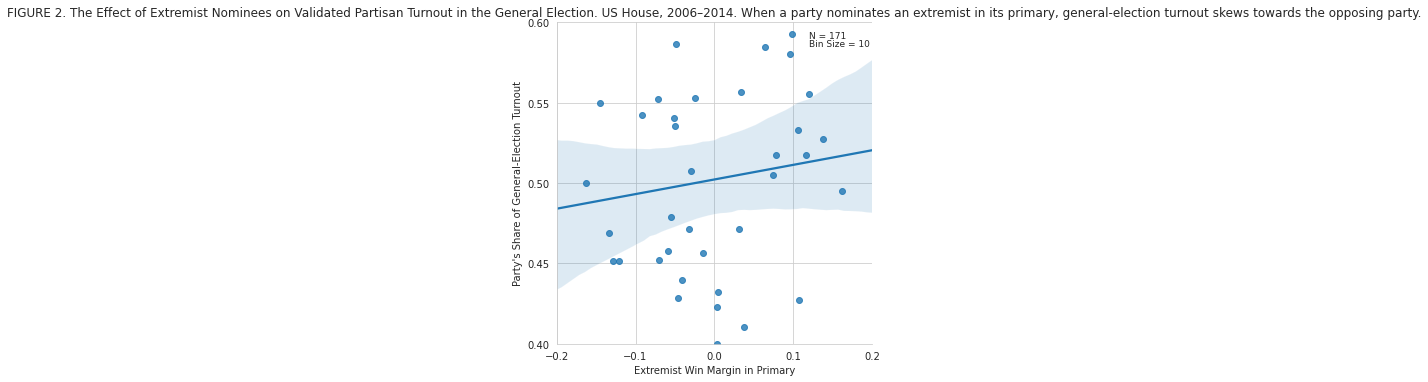

In [9]:
#figure2: binned averages of extremist candidate's win margin in each primary (x) against general election vote share of primary winner (y)
#set x=mean(rv) and y=mean(turnout_party_share)
sns.set_style("whitegrid")

g = sns.lmplot(x="rv", y="turnout_party_share", data=df3, robust=True) 
g.set_axis_labels("Extremist Win Margin in Primary", "Party's Share of General-Election Turnout").set(xlim=(-0.2, 0.2), ylim=(0.40, 0.60), xticks=[-0.2, -0.1, 0.0, 0.1, 0.2], yticks=[0.40, 0.45, 0.50, 0.55, 0.60]).fig.subplots_adjust(wspace=0.0)
plt.text(0.12, 0.590, "N = 171", fontsize=9)
plt.text(0.12, 0.585, "Bin Size = 10", fontsize=9)
plt.title("FIGURE 2. The Effect of Extremist Nominees on Validated Partisan Turnout in the General Election. US House, 2006–2014. When a party nominates an extremist in its primary, general-election turnout skews towards the opposing party.", fontsize=12);

In [10]:
#table2: formal estimates using same specifications as vote share RD
partisan_share_of_turnout = pd.DataFrame() 
partisan_share_of_turnout["c1"] = smf.ols(formula='turnout_party_share ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).bse
partisan_share_of_turnout["c2"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
partisan_share_of_turnout["c3"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
partisan_share_of_turnout["c4"] = smf.ols(formula='turnout_party_share ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).bse 
partisan_share_of_turnout 

,c1,c2,c3,c4
Intercept,0.039547,0.025451,0.033373,0.012571
treat,0.046924,0.047706,0.054764,NaN
rv,0.587667,0.247197,0.354348,0.109975
treat_rv,0.719748,NaN,NaN,NaN
